In [2]:
import cv2
from skimage.color import rgb2gray
from skimage.io import imread
from utils import s
import matplotlib.pyplot as plt
import numpy as np
import math


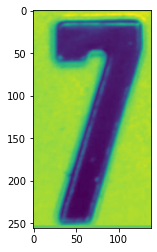

In [5]:
im = cv2.imread("input/fft.png")
im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
s(im)

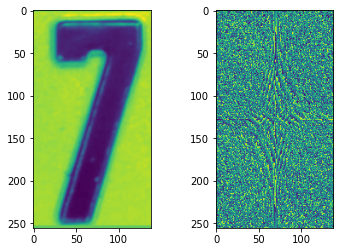

In [7]:
dft = np.fft.fft2(im)
dft_shift = np.fft.fftshift(dft)#shift to center
phase_spectrum = np.angle(dft_shift)
fig,axes = plt.subplots(1,2)
axes[0].imshow(im)
axes[1].imshow(phase_spectrum)

# IMAGE FILTERING

In [9]:
def distance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

## Ideal Low Pass Filter (ILPF)

In [10]:
def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

[10, 20, 30, 40]


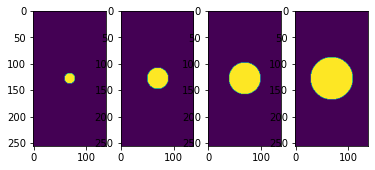

In [19]:
lst_D = [10*i for i in range(1,5)]
print(lst_D)
fig, axes = plt.subplots(1,4)
lst_plot = [axes[idx].imshow(idealFilterLP(lst_D[idx],im.shape)) for idx in range(len(lst_D))]

## Ideal High Pass Filter (IHPF)

In [20]:
def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

[10, 20, 30, 40]


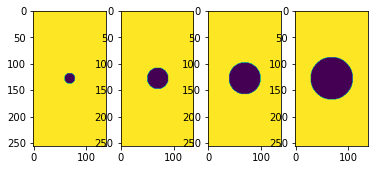

In [21]:
lst_D = [10*i for i in range(1,5)]
print(lst_D)
fig, axes = plt.subplots(1,4)
lst_plot = [axes[idx].imshow(idealFilterHP(lst_D[idx],im.shape)) for idx in range(len(lst_D))]

## Gaussian Low Pass Filter (GLPF)

In [23]:
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = math.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

[10, 20, 30, 40]


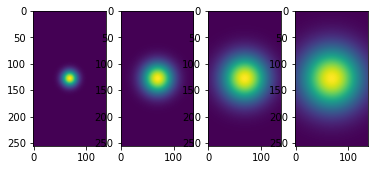

In [24]:
lst_D = [10*i for i in range(1,5)]
print(lst_D)
fig, axes = plt.subplots(1,4)
lst_plot = [axes[idx].imshow(gaussianLP(lst_D[idx],im.shape)) for idx in range(len(lst_D))]

## Gaussian High Pass Filter (GHPF)

In [25]:
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - math.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

[10, 20, 30, 40]


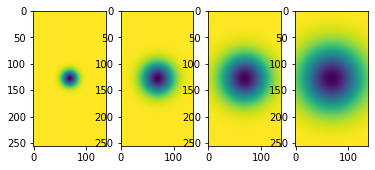

In [26]:
lst_D = [10*i for i in range(1,5)]
print(lst_D)
fig, axes = plt.subplots(1,4)
lst_plot = [axes[idx].imshow(gaussianHP(lst_D[idx],im.shape)) for idx in range(len(lst_D))]

## Butterworth Low Pass Filter (BLPF)

In [28]:
def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

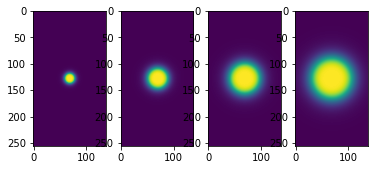

In [29]:
lst_D = [10*i for i in range(1,5)]
n = 3
base = butterworthLP(D0,im.shape,n)
fig, axes = plt.subplots(1,4)
lst_plot = [axes[idx].imshow(butterworthLP(lst_D[idx],im.shape,n)) for idx in range(len(lst_D))]

## Butterworth High Pass Filter (BHPF)

In [ ]:
def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

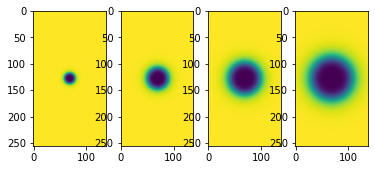

In [31]:
lst_D = [10*i for i in range(1,5)]
n = 3
base = butterworthLP(D0,im.shape,n)
fig, axes = plt.subplots(1,4)
lst_plot = [axes[idx].imshow(butterworthHP(lst_D[idx],im.shape,n)) for idx in range(len(lst_D))]

## High Frequency Emphasis Filter